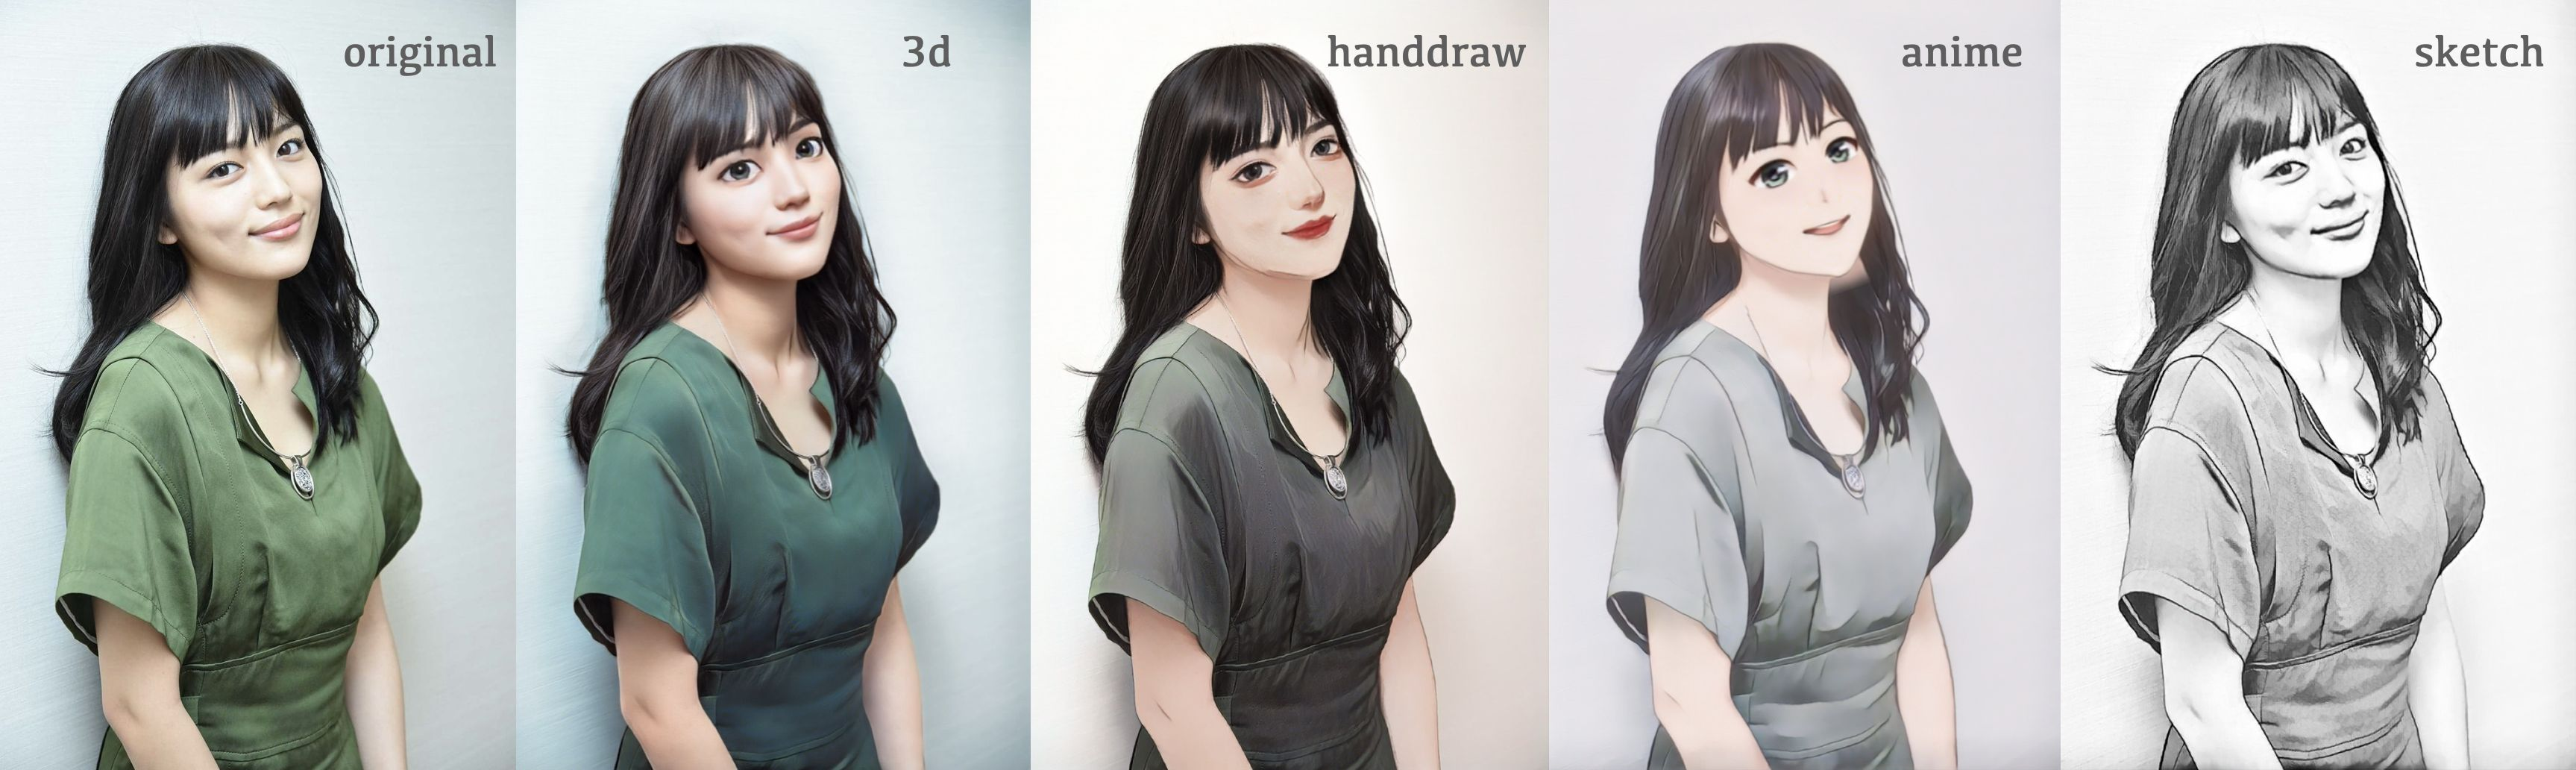

In [ ]:
#@title **setup**

# install modelscope
! pip install "modelscope[cv]" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
! pip install --upgrade urllib3

# inital setting
! git clone https://github.com/onlyno999/DCT.git
%cd DCT
from function import *
! mkdir picture/images

# make pipline
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

model_dict = {
    "anime": "damo/cv_unet_person-image-cartoon_compound-models",
    "3d": "damo/cv_unet_person-image-cartoon-3d_compound-models",
    "handdrawn": "damo/cv_unet_person-image-cartoon-handdrawn_compound-models",
    "sketch": "damo/cv_unet_person-image-cartoon-sketch_compound-models",
    "art": "damo/cv_unet_person-image-cartoon-artstyle_compound-models"
}

img_anime = pipeline(Tasks.image_portrait_stylization, model= model_dict["anime"])
img_3d = pipeline(Tasks.image_portrait_stylization, model= model_dict["3d"])
img_handdrawn = pipeline(Tasks.image_portrait_stylization, model= model_dict["handdrawn"])
img_sketch = pipeline(Tasks.image_portrait_stylization, model= model_dict["sketch"])
img_art = pipeline(Tasks.image_portrait_stylization, model= model_dict["art"])

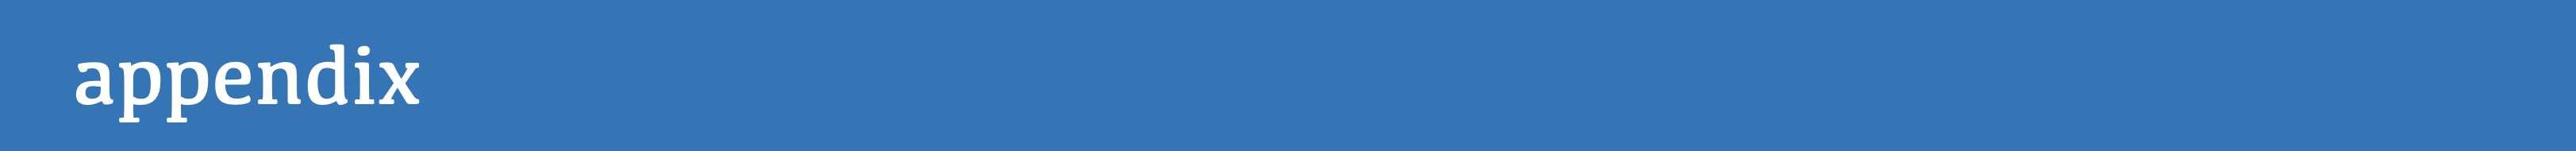

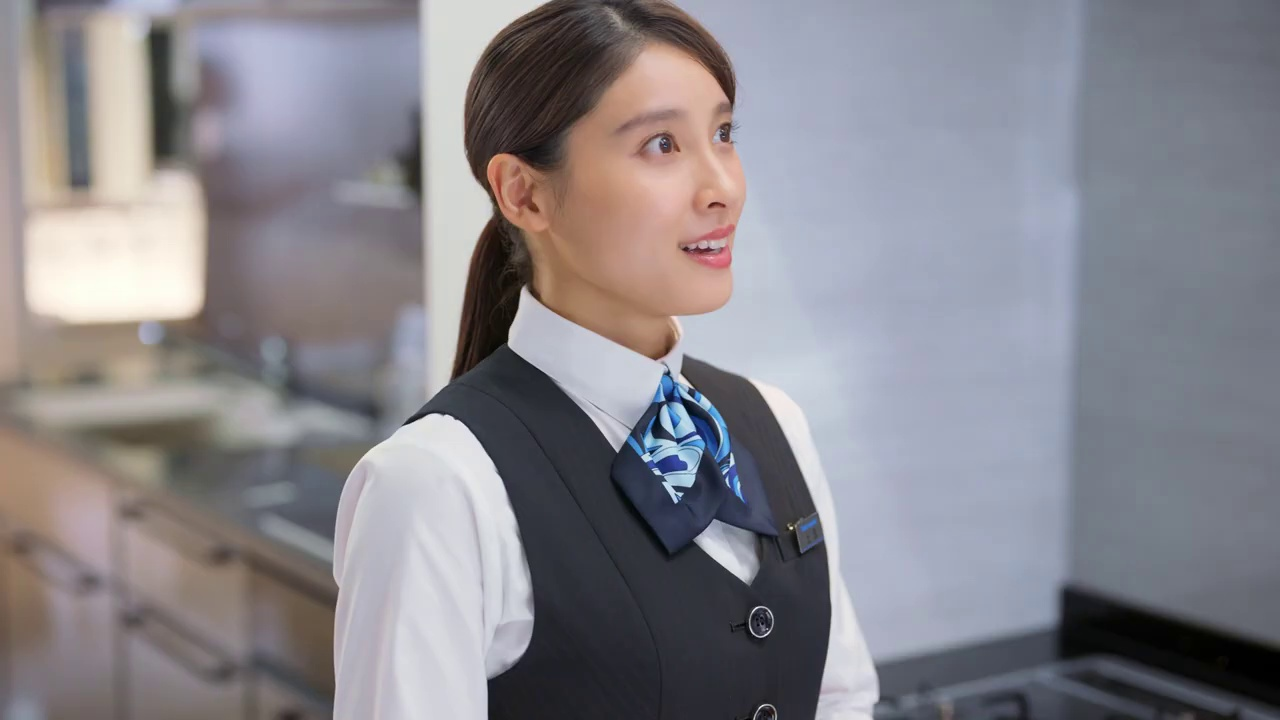

fps =  22.82825387311556
frames =  37
interval =  1
height, width  =  720 1280


In [3]:
#@title **video-to-frames**
#@markdown upload video(mp4) with sound to movie/video folder

video = '02.mp4' #@param {type:"string"}
video_file = 'movie/video/'+video
image_dir='movie/frames/'
image_file='%s.jpg'

# video_2_images
reset_folder('movie/frames')
fps, i, interval = video_2_images(video_file, image_dir, image_file)

# display strat frame
from google.colab.patches import cv2_imshow
img = cv2.imread('movie/frames/000000.jpg')
height, width = img.shape[:2]
cv2_imshow(img)

# display parameter
print('fps = ', fps)
print('frames = ', i)
print('interval = ', interval)
print('height, width  = ', height, width )

In [ ]:
#@title **make video with various style**
import glob
from tqdm import tqdm
import cv2,os
opj = os.path.join
style = "anime" #@param ["anime", "3d", "handdrawn", "sketch", "art"]
reset_folder('movie/images')

# style transfer each frame
files = sorted(glob.glob('movie/frames/*.jpg'))
for i, file in enumerate(tqdm(files)):
   if style == 'anime': result = img_anime(file)
   if style == '3d': result = img_3d(file)
   if style == 'handdrawn': result = img_handdrawn(file)
   if style == 'sketch': result = img_sketch(file)
   if style == 'art': result = img_art(file)
   save_name = 'movie/images/' + str(i).zfill(6) + '.jpg'
   cv2.imwrite(save_name, result[OutputKeys.OUTPUT_IMG])

# make movie
print('making movie...')
codec = cv2.VideoWriter_fourcc(*'mp4v')
fps_r = fps/interval
video_out = cv2.VideoWriter(opj(r'/content', f'{video}_out.mp4'), codec, fps_r, (width, height))
save_p = 'movie/images/'
fs = [x for x in os.listdir(save_p)]
fs = sorted(fs)
fs = [opj(save_p, x) for x in fs]
pbar = tqdm(total=len(fs), ncols=80)  
pbar.set_description(f"Making: vid: ")
for i in fs:
    video_out.write(cv2.imread(i))
    pbar.update(1)
pbar.close()
video_out.release()


In [ ]:
#@title **download movie** (chrome)
from google.colab import files
files.download(opj(r'/content', f'{video}_out.mp4'))